In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score


def data_import_save(url =  "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv", 
                         savepath = '..\\src\\data\\churn_detection_raw.csv'):
    df_temp = pd.read_csv(url)
    df_temp.to_csv(savepath)
    return df_temp

# a function that returns each colum unique values, whit the amount of uniques
def info_dados(df):
    columns = df.columns
    for column in columns:
        print(f'Column: {column}')
        print(df[column].unique(), f'Shape: {df[column].unique().shape[0]}', df[column].dtype)
        
# procura coluna com numeros inteiros que tenham apenas zeros e uns e os transforma em uint8
def zeroum_to_uint8(df):
    for column in df.columns:
        if (str(df[column].dtype).startswith('int') or str(df[column].dtype).startswith('float')) and df[column].unique().sum() == 1:
            df[column] = df[column].astype('uint8')
        

In [2]:
df_raw = data_import_save()
df = pd.get_dummies(df_raw,drop_first=True)
df

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge_Sim,Dependentes_Sim,TelefoneFixo_Sim,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,...,TVaCabo_Sim,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,PagamentoOnline_Sim,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn_Sim
0,0,1,29.85,1,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,34,56.95,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,2,53.85,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
3,0,45,42.30,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,2,70.70,0,0,1,0,0,1,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,0,1,0,0,...,1,0,1,0,1,1,0,1,0,0
7039,0,72,103.20,1,1,1,0,1,1,0,...,1,0,1,0,1,1,0,0,0,0
7040,0,11,29.60,1,1,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7041,1,4,74.40,1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,1


In [3]:
info_dados(df_raw)

Column: Maior65Anos
[0 1] Shape: 2 int64
Column: Conjuge
['Sim' 'Nao'] Shape: 2 object
Column: Dependentes
['Nao' 'Sim'] Shape: 2 object
Column: MesesDeContrato
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Shape: 73 int64
Column: TelefoneFixo
['Nao' 'Sim'] Shape: 2 object
Column: VariasLinhasTelefonicas
['SemServicoTelefonico' 'Nao' 'Sim'] Shape: 3 object
Column: ServicoDeInternet
['DSL' 'FibraOptica' 'Nao'] Shape: 3 object
Column: SegurancaOnline
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: BackupOnline
['Sim' 'Nao' 'SemServicoDeInternet'] Shape: 3 object
Column: SeguroNoDispositivo
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: SuporteTecnico
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: TVaCabo
['Nao' 'Sim' 'SemServicoDeInternet'] Shape: 3 object
Column: Streamin

é importante destacar que os clientes que não tem serviço online automaticamente não teriam os serviços relacionados e portanto poderiam se relacionar de forma direta ao "Não" dos dados.  
Uma análise de correlação entre essa variável "Sem serviço de internet" e o Churn pode ajudar a decidir

In [4]:
df_raw.describe(include = "all")

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
count,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,2
top,NaN,Nao,Nao,NaN,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,NaN,Nao
freq,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,5174
mean,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [5]:
df.isna().sum()

Maior65Anos                                     0
MesesDeContrato                                 0
ContaMensal                                     0
Conjuge_Sim                                     0
Dependentes_Sim                                 0
TelefoneFixo_Sim                                0
VariasLinhasTelefonicas_SemServicoTelefonico    0
VariasLinhasTelefonicas_Sim                     0
ServicoDeInternet_FibraOptica                   0
ServicoDeInternet_Nao                           0
SegurancaOnline_SemServicoDeInternet            0
SegurancaOnline_Sim                             0
BackupOnline_SemServicoDeInternet               0
BackupOnline_Sim                                0
SeguroNoDispositivo_SemServicoDeInternet        0
SeguroNoDispositivo_Sim                         0
SuporteTecnico_SemServicoDeInternet             0
SuporteTecnico_Sim                              0
TVaCabo_SemServicoDeInternet                    0
TVaCabo_Sim                                     0


In [208]:
df.corr()['Churn_Sim'].sort_values()

MesesDeContrato                                -0.352229
SeguroNoDispositivo_SemServicoDeInternet       -0.227890
TVaCabo_SemServicoDeInternet                   -0.227890
SuporteTecnico_SemServicoDeInternet            -0.227890
BackupOnline_SemServicoDeInternet              -0.227890
StreamingDeFilmes_SemServicoDeInternet         -0.227890
ServicoDeInternet_Nao                          -0.227890
SegurancaOnline_SemServicoDeInternet           -0.227890
TipoDeContrato_UmAno                           -0.177820
SegurancaOnline_Sim                            -0.171226
SuporteTecnico_Sim                             -0.164674
Dependentes_Sim                                -0.164221
Conjuge_Sim                                    -0.150448
FormaDePagamento_DebitoEmConta                 -0.117937
FormaDePagamento_ChequePapel                   -0.091683
BackupOnline_Sim                               -0.082255
SeguroNoDispositivo_Sim                        -0.066160
VariasLinhasTelefonicas_SemServ

<AxesSubplot: >

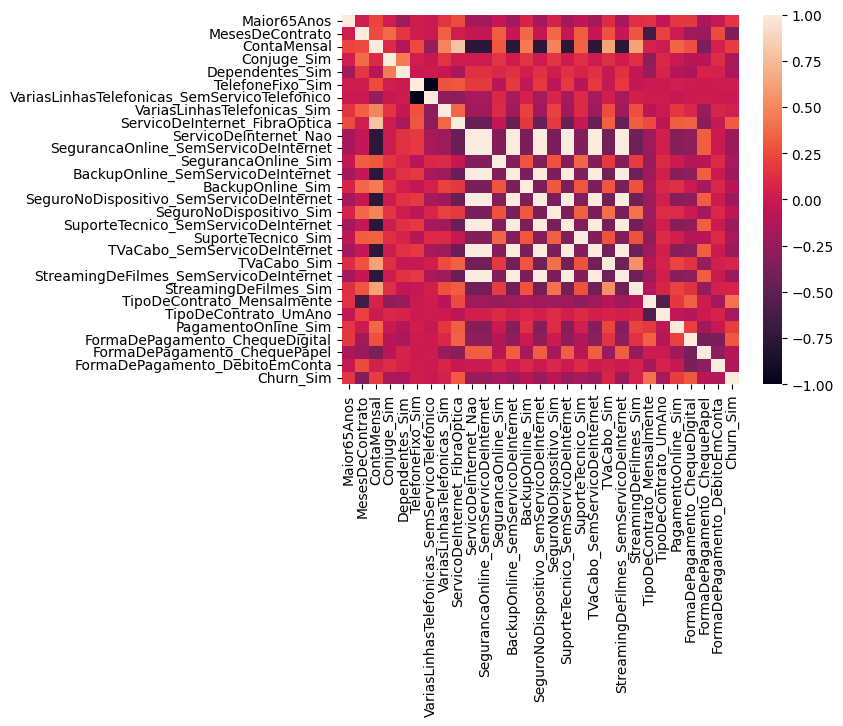

In [209]:
sns.heatmap(df.corr(),xticklabels=1, yticklabels=1)

A pesar de de apresentarem uma correlação fraca +- 0,2, há uma diferença entre o cliente não ter o serviço e ele ter e apenas optar por não assinar o serviço.

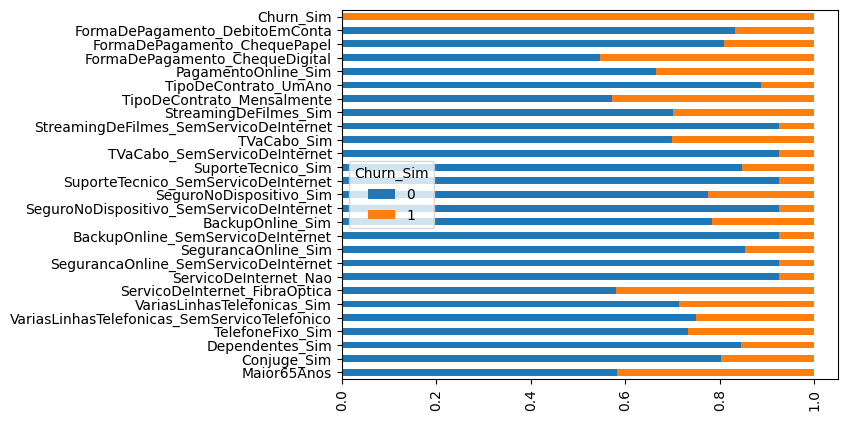

In [6]:
#Plot doas variáveis apenas com sim e não para ver se elas dividem o dataset, DESBALANCEADO
zeroum_to_uint8(df)
A = df.select_dtypes(include = 'uint8').groupby(df.Churn_Sim, sort = False).sum().div(df.select_dtypes(include = 'uint8').sum(axis=0), axis=1).T
A.plot(kind="barh", rot=0, stacked=True, )
plt.xticks(rotation = 90)
plt.show()

# Balanceamento de dados

O banco de dados está desbalanceado quanto ao Churn, um balanceamento por oversampling será feito com o SMOTE

In [7]:
# conferindo o balanceamento da target
df.Churn_Sim.value_counts()

0    5174
1    1869
Name: Churn_Sim, dtype: int64

In [8]:
y = df.Churn_Sim
X = df.drop('Churn_Sim', axis=1)

In [9]:
smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)

In [10]:
# conferindo a atarget balanceada pelo obersampling via SMOTE
y.value_counts()

0    5174
1    5174
Name: Churn_Sim, dtype: int64

In [11]:
zeroum_to_uint8(X)

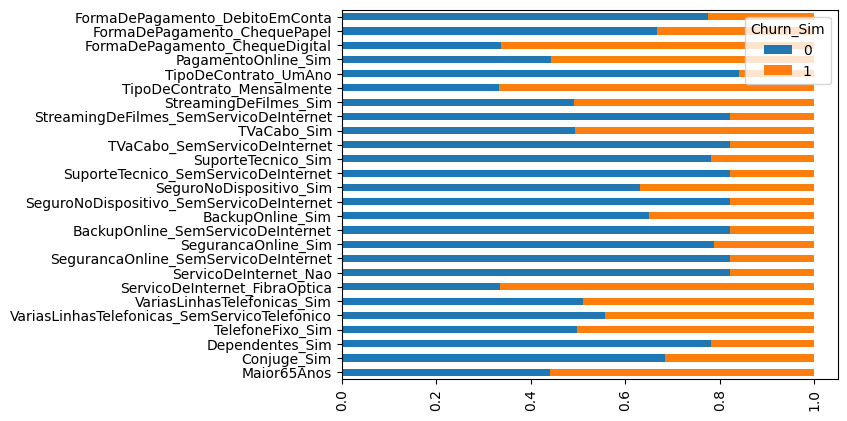

In [12]:
# Agrupa os dados binados e os somas de acordo com a categoria, dividindo em seguida para normalizar os valores
A = X.select_dtypes(include = 'uint8').groupby([y], sort = False).sum()
A = A.div(X.select_dtypes(include = 'uint8').sum(axis=0), axis=1)
A = A.T
# Faz o plot dos dados em barras horizontais de forma normalizada para observar a divisão do targuet entre os dados
A.plot(kind="barh", rot=0, stacked=True, )
plt.xticks(rotation = 90)
plt.show()

In [15]:
# A = X.select_dtypes(exclude = 'uint8').groupby([y], sort = False).sum().div(X.select_dtypes(include = 'uint8').sum(axis=0), axis=1).T
# A.iloc[3:].plot(kind="scatter", rot=0, stacked=True, )
# plt.xticks(rotation = 90)
# plt.show()
# df.plot()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7938506588579795

In [32]:
print(confusion_matrix(y_test,knn.predict(X_test)))


[[1280  450]
 [ 254 1431]]


# Naive Bayes


In [38]:
from sklearn.naive_bayes import BernoulliNB

In [34]:
bnb = BernoulliNB(binarize=np.mean(X_train))
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)


0.7879941434846266

In [35]:
print(confusion_matrix(y_test,bnb.predict(X_test)))


[[1240  490]
 [ 234 1451]]


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
tree.score(X_test,y_test)

0.7669106881405564

In [40]:
a = pd.DataFrame([df.drop('Churn_Sim', axis=1).columns.tolist(),tree.feature_importances_.tolist()])
a = a.transpose()
a.sort_values(by = 1,ascending=False).head(5)

,0,1
22,TipoDeContrato_Mensalmente,0.507399
1,MesesDeContrato,0.189806
8,ServicoDeInternet_FibraOptica,0.094572
11,SegurancaOnline_Sim,0.082763
12,BackupOnline_SemServicoDeInternet,0.064861


In [41]:
print(confusion_matrix(y_test,tree.predict(X_test)))

[[1232  498]
 [ 298 1387]]


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

# Comparação entre os modelos

O objetivo da análise é detectar os clientes mais provávei de deixarem a empresa e intervir e oferecer um produto.
Para isso, uma opção é avaliar seria avaliar a precisão, porém o score F1 e a área abaixo da curva ROC são melhores.

In [44]:
print('O score F1 do KNN é:',f1_score(y_test,knn.predict(X_test)))
print('O score F1 do Naive Bayes é:',f1_score(y_test,bnb.predict(X_test)))
print('O score F1 do Árvore de Decisão é:',f1_score(y_test,tree.predict(X_test)))
print('O score F1 da Regressão Logistica é:',f1_score(y_test,tree.predict(X_test)))

O score F1 do KNN é: 0.8025799214806505
O score F1 do Naive Bayes é: 0.8003309431880861
O score F1 do Árvore de Decisão é: 0.7770308123249301
O score F1 da Regressão Logistica é: 0.7770308123249301


In [45]:
print('O score AUC ROC do KNN é:',roc_auc_score(y_test,knn.predict(X_test)))
print('O score AUC ROC do Naive Bayes é:',roc_auc_score(y_test,bnb.predict(X_test)))
print('O score AUC ROC do Árvore de Decisão é:',roc_auc_score(y_test,tree.predict(X_test)))
print('O score F1 da Regressão Logistica é:',roc_auc_score(y_test,tree.predict(X_test)))

O score AUC ROC do KNN é: 0.7945712766504864
O score AUC ROC do Naive Bayes é: 0.7889453011097579
O score AUC ROC do Árvore de Decisão é: 0.7676420644585856
O score F1 da Regressão Logistica é: 0.7676420644585856


Nas duas métricas o melhor modelo foi o KNN e o mesmo podeá fazer a previsão se um novo cliente vai deixar a empresa.
Porém a Regressão logistica e a árvore de decisão podem dar importâncias de variáveis, que podem fornecer dias de o porquê o cliente deixa a empresa.

In [46]:
lr.coef_

array([[-0.07699347, -0.84788306,  8.25531349, -0.1164779 , -0.22724114,
        -2.56097942, -0.70722718, -0.62937038, -3.00820371,  0.33783218,
         0.33783218, -0.83523216,  0.33783218, -0.80367644,  0.33783218,
        -0.6791441 ,  0.33783218, -0.88487291,  0.33783218, -1.22132283,
         0.33783218, -1.26528558,  0.18574384, -0.185437  , -0.02556481,
        -0.16321951, -0.25485526, -0.37401241]])

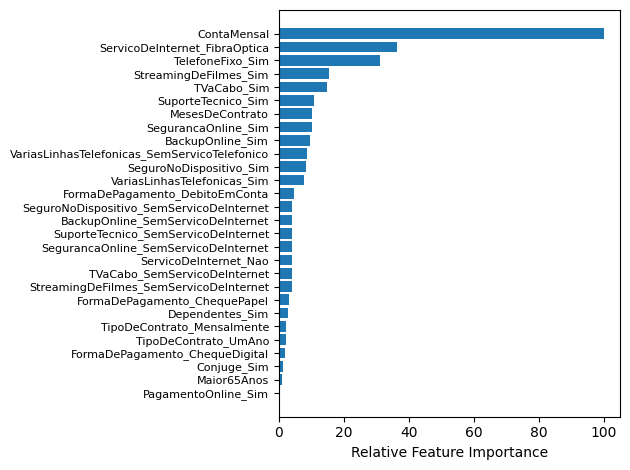

In [47]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## Análise de Churn em uma Empresa de Telefonia e Internet

Este é um estudo de caso sobre o problema de churn em uma empresa de telefonia e internet. O churn é a taxa de perda de clientes que cancelam seus serviços, e é um problema crítico que pode afetar negativamente a receita e a imagem da marca da empresa.

A empresa oferece serviços de telefonia e internet, incluindo:
> Planos de telefone fixo, de dados móveis e de banda larga.  
> Pacotes de TV a cabo, de Streaming de Filmes e de
> Serviços de Backup Online, Segurança online e Seguro de Dispositivo 

. O objetivo é identificar os principais fatores que influenciam a taxa de churn e propor soluções para reduzir essa taxa e reter os clientes.

Os dados foram coletados a partir de várias fontes, incluindo registros de clientes, informações de faturamento e logs de chamadas de suporte. O conjunto de dados contém informações demográficas dos clientes, histórico de pagamentos e uso de serviços, bem como avaliações de satisfação e feedback de atendimento ao cliente.

A análise exploratória dos dados será realizada para identificar padrões e tendências nos dados, bem como relacionamentos entre as variáveis. Em seguida, serão aplicadas técnicas de modelagem preditiva para prever a taxa de churn e identificar os principais fatores que contribuem para essa taxa. Também serão propostas soluções para reduzir a taxa de churn, como melhorar a qualidade do serviço, ajustar preços, oferecer promoções e incentivos de fidelização, e melhorar o atendimento ao cliente.

O resultado esperado é fornecer insights valiosos sobre o problema de churn em uma empresa de telefonia e internet e fornecer recomendações práticas para reduzir essa taxa e reter os clientes.



In [48]:
df_raw

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Sim,Sim,24,Sim,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,Sim,ChequePapel,84.80,Nao
7039,0,Sim,Sim,72,Sim,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,Sim,CartaoDeCredito,103.20,Nao
7040,0,Sim,Sim,11,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.60,Nao
7041,1,Sim,Nao,4,Sim,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,74.40,Sim


In [54]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [9]:
df_raw['Churn'] = df_raw.Churn.replace({'Nao':0,'Sim':1})

In [45]:
df_train, df_test = train_test_split(df_raw, test_size=0.33, random_state=42)

In [61]:
lista_num = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' not in str(df_raw[col].dtype)]
lista_obj = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' in str(df_raw[col].dtype)]
encoder = OneHotEncoder()
scaler = StandardScaler()

# balancer = SMOTE()
# model = RandomForestClassifier(max_depth=5)

steps_num = [('scaler',scaler)]
steps_cat = [('encoder',encoder)]

pipe_num = Pipeline(steps_num)
pipe_cat = Pipeline(steps_cat)

pre_process = ColumnTransformer(transformers=[('num', pipe_num,lista_num),('cat',pipe_cat,lista_obj)])
lista_modelo = [KNeighborsClassifier(n_neighbors=10),LogisticRegression(),
                DecisionTreeClassifier(max_depth=5), RandomForestClassifier(max_depth=5),
               GradientBoostingClassifier(n_estimators=30)]
lista_balancer = [SMOTE(),RandomUnderSampler(),NeighbourhoodCleaningRule(n_neighbors=5)]
for model in lista_modelo:
    for balancer in lista_balancer:
        step = [('pre_process',pre_process),('balancer',balancer),('model',model)]

        pipe = Pipeline(step)
        pipe.fit(df_train,df_train.Churn)
            
        score = roc_auc_score(df_test.Churn,pipe.predict(df_test))
        score_f1 = f1_score(df_test.Churn,pipe.predict(df_test))
        print(model, balancer, 'ROC_AUC Score: {:.4f}'.format(score),'F1 Score: {:.4f}'.format(score_f1))
    print('')
        

KNeighborsClassifier(n_neighbors=10) SMOTE() ROC_AUC Score: 0.7364 F1 Score: 0.5974
KNeighborsClassifier(n_neighbors=10) RandomUnderSampler() ROC_AUC Score: 0.7537 F1 Score: 0.6156
KNeighborsClassifier(n_neighbors=10) NeighbourhoodCleaningRule(n_neighbors=5) ROC_AUC Score: 0.7617 F1 Score: 0.6198

LogisticRegression() SMOTE() ROC_AUC Score: 0.7782 F1 Score: 0.6481
LogisticRegression() RandomUnderSampler() ROC_AUC Score: 0.7752 F1 Score: 0.6437
LogisticRegression() NeighbourhoodCleaningRule(n_neighbors=5) ROC_AUC Score: 0.7736 F1 Score: 0.6369

DecisionTreeClassifier(max_depth=5) SMOTE() ROC_AUC Score: 0.7626 F1 Score: 0.6266
DecisionTreeClassifier(max_depth=5) RandomUnderSampler() ROC_AUC Score: 0.7663 F1 Score: 0.6309
DecisionTreeClassifier(max_depth=5) NeighbourhoodCleaningRule(n_neighbors=5) ROC_AUC Score: 0.7675 F1 Score: 0.6299

RandomForestClassifier(max_depth=5) SMOTE() ROC_AUC Score: 0.7684 F1 Score: 0.6384
RandomForestClassifier(max_depth=5) RandomUnderSampler() ROC_AUC Score:

In [63]:
from sklearn.model_selection import GridSearchCV

In [67]:
lista_num = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' not in str(df_raw[col].dtype)]
lista_obj = [col for col in df_raw.drop('Churn',axis=1).columns if 'object' in str(df_raw[col].dtype)]
encoder = OneHotEncoder()
scaler = StandardScaler()

steps_num = [('scaler',scaler)]
steps_cat = [('encoder',encoder)]

pipe_num = Pipeline(steps_num)
pipe_cat = Pipeline(steps_cat)

pre_process = ColumnTransformer(transformers=[('num', pipe_num,lista_num),('cat',pipe_cat,lista_obj)])

lista_balancer = [SMOTE(),RandomUnderSampler(),NeighbourhoodCleaningRule(n_neighbors=5)]

model = GradientBoostingClassifier()

step = [('pre_process',pre_process),('balancer',balancer),('model',model)]
pipe = Pipeline(step)


In [79]:
param = {'model__n_estimators':[10,50,100,200], 'model__max_depth':[1,2,3,4]}

In [80]:
gcv = GridSearchCV(pipe,scoring='f1',n_jobs=-1, param_grid=param)

In [81]:
gcv.fit(df_train,df_train.Churn)

GridSearchCV(estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Maior65Anos',
                                                                          'MesesDeContrato',
                                                                          'ContaMensal']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Conjuge',
                                                                          'Dependentes',
                                                                          'TelefoneFixo',
                                                                          'VariasLinhasTelefonicas',
                                                                          'ServicoDeInternet',
                                                                          'SegurancaOnline',
                                                                          'BackupOnline',
                                                                          'SeguroNoDispositivo',
                                                                          'SuporteTecnico',
                                                                          'TVaCabo',
                                                                          'StreamingDeFilmes',
                                                                          'TipoDeContrato',
                                                                          'PagamentoOnline',
                                                                          'FormaDePagamento'])])),
                                       ('balancer',
                                        NeighbourhoodCleaningRule(n_neighbors=5)),
                                       ('model',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [1, 2, 3, 4],
                         'model__n_estimators': [10, 50, 100, 200]},
             scoring='f1')

In [84]:
pd.DataFrame(gcv.cv_results_).sort_values('rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.930297,0.189586,0.016803,0.00194,2,100,"{'model__max_depth': 2, 'model__n_estimators':...",0.622093,0.618401,0.623338,0.613050,0.622901,0.619957,0.003867,1
10,1.149012,0.078189,0.019999,0.00708,3,100,"{'model__max_depth': 3, 'model__n_estimators':...",0.617176,0.614693,0.623145,0.615854,0.627093,0.619592,0.004748,2


In [85]:
gcv.best_params_

{'model__max_depth': 2, 'model__n_estimators': 100}

In [87]:
melhor_modelo = gcv.best_estimator_

In [89]:
f1_score(df_test.Churn,melhor_modelo.predict(df_test))

0.64

In [90]:
f1_score(df_train.Churn,melhor_modelo.predict(df_train))

0.6290659504625484

In [92]:
import shap

In [94]:
explainer = shap.TreeExplainer(melhor_modelo['model'])

In [98]:
X = melhor_modelo['pre_process'].transform(df_train)
y = df_train.Churn

In [101]:
shap_values = explainer.shap_values(X,y)
shap_values

array([[-0.02589075, -0.55077918, -0.09158521, ...,  0.45534155,
         0.        ,  0.        ],
       [-0.03079174,  0.70661612, -0.16621067, ..., -0.25657203,
         0.        ,  0.        ],
       [-0.03079174, -0.18427768, -0.29276318, ..., -0.22600166,
         0.        ,  0.        ],
       ...,
       [-0.02589075,  0.50978422, -0.16428479, ...,  0.41572427,
         0.        ,  0.        ],
       [ 0.14302907,  0.80522117,  0.34520802, ...,  0.48863992,
         0.        ,  0.        ],
       [-0.03079174, -0.23856372, -0.20617005, ..., -0.22600166,
         0.        ,  0.        ]])

In [108]:
melhor_modelo['pre_process'].get_feature_names_out()

array(['num__Maior65Anos', 'num__MesesDeContrato', 'num__ContaMensal',
       'cat__Conjuge_Nao', 'cat__Conjuge_Sim', 'cat__Dependentes_Nao',
       'cat__Dependentes_Sim', 'cat__TelefoneFixo_Nao',
       'cat__TelefoneFixo_Sim', 'cat__VariasLinhasTelefonicas_Nao',
       'cat__VariasLinhasTelefonicas_SemServicoTelefonico',
       'cat__VariasLinhasTelefonicas_Sim', 'cat__ServicoDeInternet_DSL',
       'cat__ServicoDeInternet_FibraOptica', 'cat__ServicoDeInternet_Nao',
       'cat__SegurancaOnline_Nao',
       'cat__SegurancaOnline_SemServicoDeInternet',
       'cat__SegurancaOnline_Sim', 'cat__BackupOnline_Nao',
       'cat__BackupOnline_SemServicoDeInternet', 'cat__BackupOnline_Sim',
       'cat__SeguroNoDispositivo_Nao',
       'cat__SeguroNoDispositivo_SemServicoDeInternet',
       'cat__SeguroNoDispositivo_Sim', 'cat__SuporteTecnico_Nao',
       'cat__SuporteTecnico_SemServicoDeInternet',
       'cat__SuporteTecnico_Sim', 'cat__TVaCabo_Nao',
       'cat__TVaCabo_SemServicoDeIntern

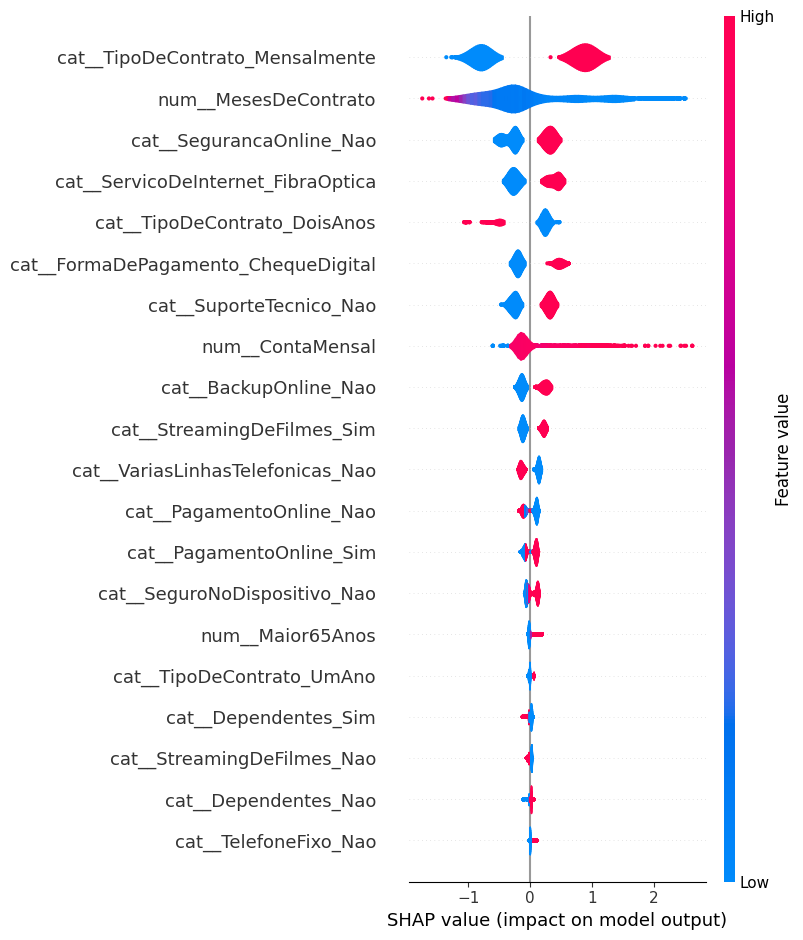

In [113]:
shap.summary_plot(shap_values, X, feature_names=melhor_modelo['pre_process'].get_feature_names_out(),plot_type='violin')

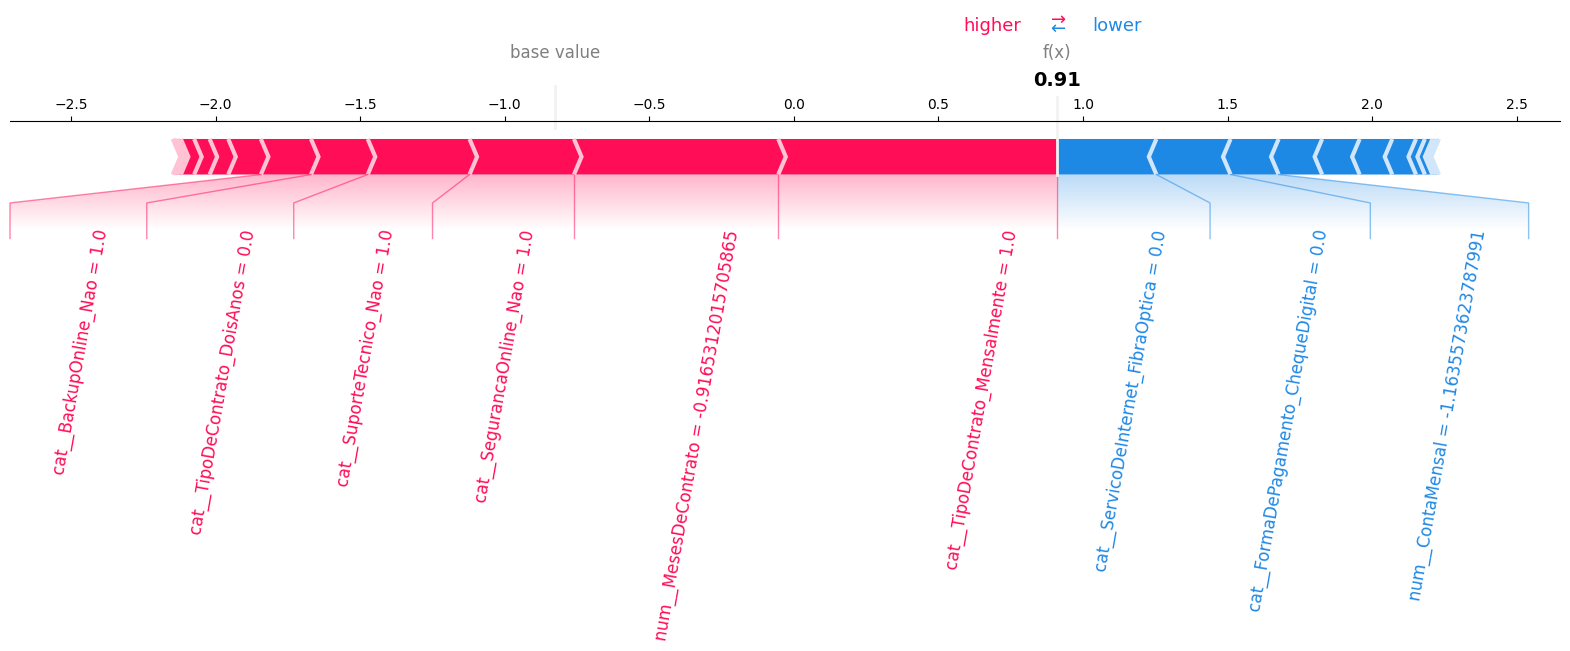

In [156]:
# X, y = shap.datasets.boston()
# bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# # explainer = shap.TreeExplainer(bst)
# # shap_values = explainer.shap_values(X)

shap.force_plot(
    explainer.expected_value, 
    shap_values[1,:], 
    X[1,:], 
    matplotlib=True, feature_names=melhor_modelo['pre_process'].get_feature_names_out(), text_rotation=80 )

In [158]:
df_train.Churn[1]

0

In [126]:
X.Churn

298     0
3318    1
5586    0
6654    1
5362    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 4718, dtype: int64

In [124]:
melhor_modelo['model']

GradientBoostingClassifier(max_depth=2)

************************************
Ground Truth Label: 0

Model Prediction:  [0] -- Correct!
************************************



UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U3')) -> None

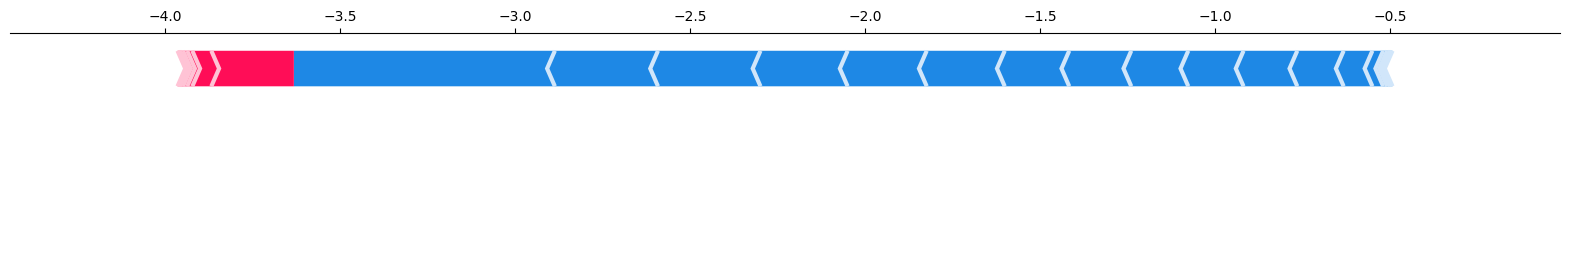

In [147]:
fig = shap_force(melhor_modelo,'model',2,X, df_train.Churn,explainer,shap_values)
fig


In [146]:

def shap_force(clf, clf_step_name, index, 
               X_train_df, y_train,
               explainer, shap_vals):
  
    """Takes in a fitted classifier Pipeline, the name of the classifier step,
        the X training DataFrame, the y train array, a shap explainer, and the
        shap values to print the ground truth and predicted label and display
        the shap force plot for the record specified by index.
    Args:
        clf (estimator): An sklearn Pipeline with a fitted classifier as the final step.
        clf_step_name (str): The name given to the classifier step of the pipe.
        X_train_df (DataFrame): A Pandas DataFrame from the train-test-split
            used to train the classifier, with column names corresponding to
            the feature names.
        y_train (series or array): Subset of y data used for training.
        index (int): The index of the observation of interest.
        explainer (shap explainer): A fitted shap.TreeExplainer object.
        shap_vals (array): The array of shap values.
    Returns:
        Figure: Shap force plot showing the breakdown of how the model made
            its prediction for the specified record in the training set.
    """    
    
    
    ## Store model prediction and ground truth label
    X_train_df = pd.DataFrame(X_train_df)
    pred = clf.named_steps[clf_step_name].predict(X_train_df.iloc[index,:].values.reshape(1, -1))
    true_label = y_train.iloc[index]
    
    
    ## Assess accuracy of prediction
    if true_label == pred:
        accurate = 'Correct!'
    else:
        accurate = 'Incorrect'
    
    
    ## Print output that checks model's prediction against true label
    print('***'*12)
    # Print ground truth label for row at index
    print(f'Ground Truth Label: {true_label}')
    print()
    # Print model prediction for row at index
    print(f'Model Prediction:  {pred} -- {accurate}')
    print('***'*12)
    print()
    
    
    ## Plot the prediction's explanation
    fig = shap.force_plot(explainer.expected_value,
                              shap_vals[index,:],
                              X_train_df.iloc[index,:],matplotlib=True)
    
    
    return fig

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)